In [18]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [19]:
n_input= 10
n_hidden= 15
n_out= 1
batch_size= 100
learning_rate = 0.01

In [20]:
data_x = torch.randn(batch_size, n_input)

In [21]:
len(data_x[0])

10

In [22]:
data_y = (torch.rand(size=(batch_size, 1)) < 0.5).float()

In [23]:
print(data_x.size())
print(data_y.size())

torch.Size([100, 10])
torch.Size([100, 1])


In [24]:
model = nn.Sequential(nn.Linear(n_input, n_hidden),
                      nn.ReLU(),
                      nn.Linear(n_hidden, n_out),
                      nn.Sigmoid())

In [25]:
print(model)

Sequential(
  (0): Linear(in_features=10, out_features=15, bias=True)
  (1): ReLU()
  (2): Linear(in_features=15, out_features=1, bias=True)
  (3): Sigmoid()
)


In [26]:
loss_function = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [27]:
losses = []
for epoch in range(5000):
    pred_y = model(data_x)
    loss = loss_function(pred_y, data_y)
    losses.append(loss.item())

    model.zero_grad()
    loss.backward()

    optimizer.step()

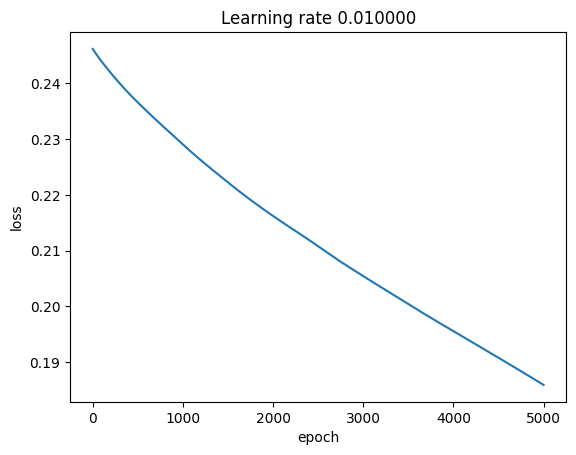

In [28]:
plt.plot(losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.title("Learning rate %f"%(learning_rate))
plt.show()